<a href="https://colab.research.google.com/github/karthik-karalgikar/Aedes/blob/main/InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls "/content/gdrive/MyDrive"

'Colab Notebooks'   Dataset_Segmentation


In [6]:
batch_size = 64
size = (224,224)

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Dataset_Segmentation",
    batch_size=batch_size,
    image_size=size,
    validation_split=0.2,
    subset="training",
    seed=123
)


ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Dataset_Segmentation",
    validation_split = 0.2,
    subset = "training",
    seed = 123)


ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/Dataset_Segmentation",
    validation_split = 0.2,
    subset = "validation",
    seed = 123)

test_path = "/content/gdrive/MyDrive/Dataset_Segmentation/Testing"

Found 664 files belonging to 2 classes.
Using 532 files for training.
Found 664 files belonging to 2 classes.
Using 532 files for training.
Found 664 files belonging to 2 classes.
Using 132 files for validation.


In [5]:
import tensorflow_datasets as tdfs

batch_size = 32

dataset_name = dataset
class_names = dataset.class_names
num_classes = len(class_names)
print(class_names)

def preprocess_image_label(image, label):
    image = tf.image.resize(image, size)
    # Convert label to one-hot encoding
    label = tf.one_hot(tf.cast(label, tf.int32), depth=num_classes)
    return image, label

ds_train_encoded = ds_train.map(preprocess_image_label)
ds_validation_encoded = ds_validation.map(preprocess_image_label)

['Testing', 'Training']


In [7]:
for image, label in ds_train_encoded.take(1):  # Taking one batch for example
    print("Image shape:", image.shape)
    print("Label shape:", label.shape)

Image shape: (32, 224, 224, 3)
Label shape: (32, 2)


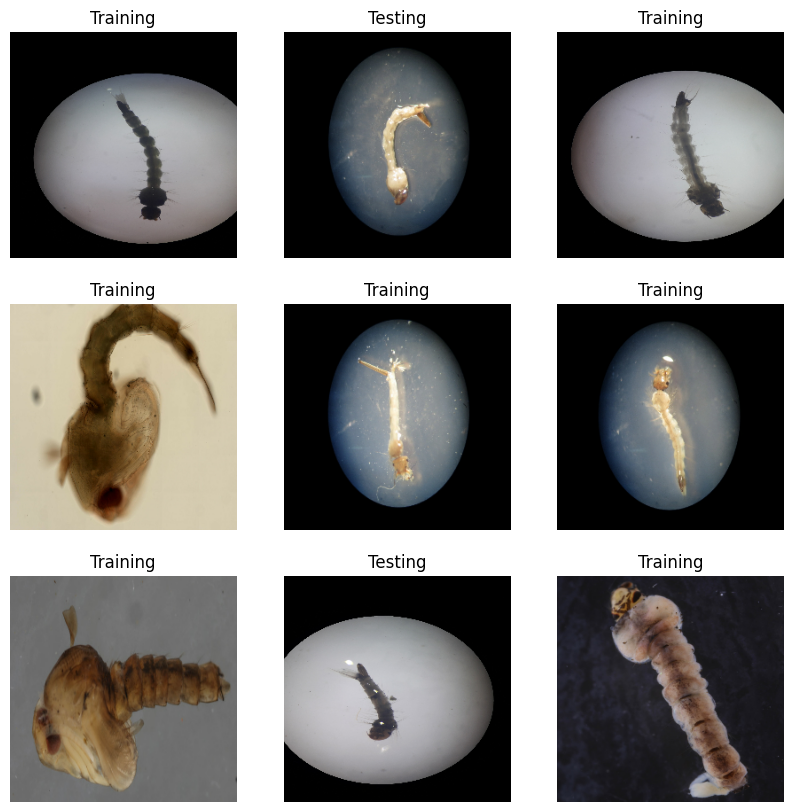

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, label in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

In [29]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [10]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [11]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 131 images belonging to 2 classes.


In [12]:
# Iterate over the dataset and print the shape of the first batch
for image, label in ds_train_encoded.take(1):
    print("Shape of images in ds_train_encoded:", image.shape)
    print("Shape of labels in ds_train_encoded:", label.shape)

for image, label in ds_validation_encoded.take(1):
    print("Shape of images in ds_validation_encoded:", image.shape)
    print("Shape of labels in ds_validation_encoded:", label.shape)

Shape of images in ds_train_encoded: (32, 224, 224, 3)
Shape of labels in ds_train_encoded: (32, 2)
Shape of images in ds_validation_encoded: (32, 224, 224, 3)
Shape of labels in ds_validation_encoded: (32, 2)


In [14]:
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import *
import numpy as np

In [16]:
IMAGE_SIZE = [224, 224]
# batch_size = 32
batch_size = 32
numOfEpochs = 10
optimizer = tf.keras.optimizers.Adam()

In [17]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [18]:
inception.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [19]:
for layer in inception.layers:
  layer.trainable = False

In [22]:
x = Flatten()(inception.output)

In [23]:
pred = Dense(2, activation= 'sigmoid')(x)

In [24]:
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
# Define input layer
input_shape = (224, 224, 3)
inputs = tf.keras.Input(shape=(input_shape))

# Add layers using functional API
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = Model(inputs = inception.input, outputs = pred)

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(ds_train_encoded, validation_data=ds_validation_encoded, epochs=100)

Epoch 1/100
17/17 [==============================] - 83s 5s/step - loss: 8.5521 - accuracy: 0.7989 - val_loss: 11.9764 - val_accuracy: 0.7121
Epoch 2/100
17/17 [==============================] - 83s 5s/step - loss: 7.4836 - accuracy: 0.7932 - val_loss: 13.5294 - val_accuracy: 0.7803
Epoch 3/100
17/17 [==============================] - 84s 5s/step - loss: 8.1059 - accuracy: 0.8158 - val_loss: 16.9779 - val_accuracy: 0.7576
Epoch 4/100
17/17 [==============================] - 88s 5s/step - loss: 8.6089 - accuracy: 0.7782 - val_loss: 11.7522 - val_accuracy: 0.7121
Epoch 5/100
17/17 [==============================] - 81s 4s/step - loss: 10.8184 - accuracy: 0.7726 - val_loss: 13.5117 - val_accuracy: 0.7197
Epoch 6/100
17/17 [==============================] - 77s 4s/step - loss: 11.8565 - accuracy: 0.7989 - val_loss: 15.2030 - val_accuracy: 0.6970
Epoch 7/100
17/17 [==============================] - 77s 4s/step - loss: 8.3321 - accuracy: 0.8083 - val_loss: 11.5200 - val_accuracy: 0.7500
Epoc

In [43]:
from matplotlib import pyplot as plt

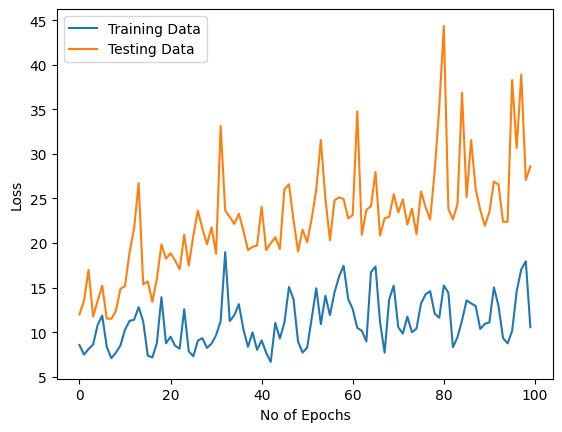

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.legend(['Training Data', 'Testing Data'])
plt.show()

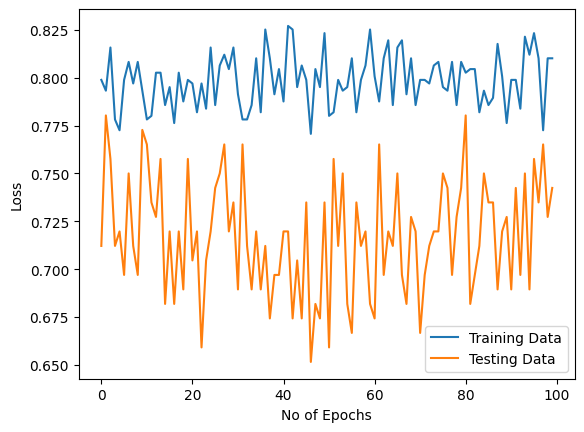

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.legend(['Training Data', 'Testing Data'])
plt.show()

In [46]:
result = model.evaluate(test_set)
print("test_loss, test accuracy",result)

3/3 [==============================] - 18s 4s/step - loss: 279.6055 - accuracy: 0.4427
test_loss, test accuracy [279.6054992675781, 0.442748099565506]
